In [1]:
# Refer to https://www.tensorflow.org/tutorials/images/classification#download_and_explore_the_dataset

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
import pathlib

In [2]:
datset_url = 'F:/Deep Learning/CNN Project/data/train'
data_dir = pathlib.Path(datset_url)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

40


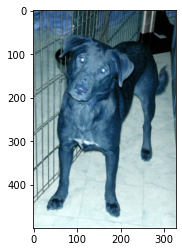

In [3]:
dogs = list(data_dir.glob('dogs/*'))
img= cv2.imread(str(dogs[0]))
plt.imshow(img)

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40 files belonging to 2 classes.
Using 32 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40 files belonging to 2 classes.
Using 8 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


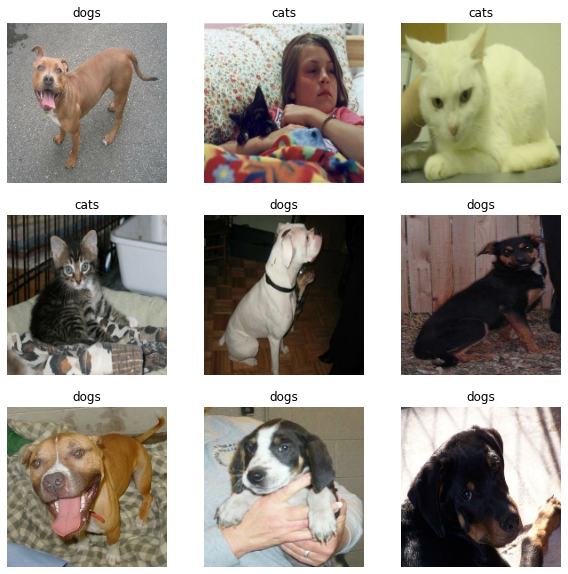

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [10]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, kernel_size=[5,5], padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2),strides=2),
  layers.Conv2D(64, kernel_size=[5,5], padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2),strides=2),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'),
  layers.Dense(num_classes),
  layers.Dropout(0.4)  
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs=100
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6717 - accuracy: 0.5000 - val_loss: 0.6650 - val_accuracy: 0.6250
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.6402 - accuracy: 0.6250 - val_loss: 0.7552 - val_accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.6730 - accuracy: 0.6562 - val_loss: 0.7551 - val_accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.6584 - accuracy: 0.6250 - val_loss: 0.7938 - val_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.6183 - accuracy: 0.7188 - val_loss: 0.6466 - val_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.6344 - accuracy: 0.6562 - val_loss: 0.6659 - val_accuracy: 0.6250
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.6128 - accuracy: 0.7188 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 8/100
1/1 [=================

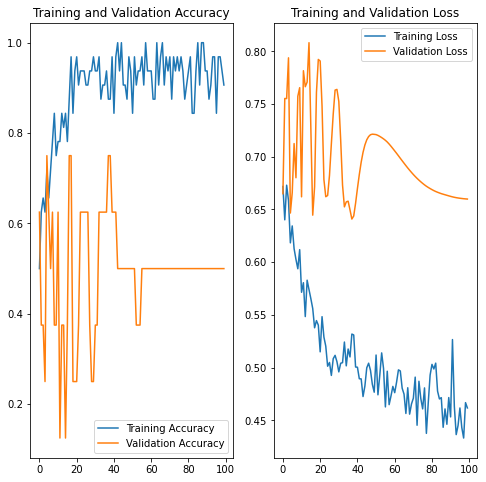

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
epochs=200
history1 = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.3194 - accuracy: 0.9375 - val_loss: 0.7438 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 0.2781 - accuracy: 0.8438 - val_loss: 0.7440 - val_accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 0.2467 - accuracy: 0.9062 - val_loss: 0.7444 - val_accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 0.2568 - accuracy: 0.9375 - val_loss: 0.7447 - val_accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 0.3143 - accuracy: 0.9062 - val_loss: 0.7450 - val_accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 0.2219 - accuracy: 0.9688 - val_loss: 0.7453 - val_accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 0.2746 - accuracy: 0.9375 - val_loss: 0.7456 - val_accuracy: 0.5000
Epoch 8/200
1/1 [=================

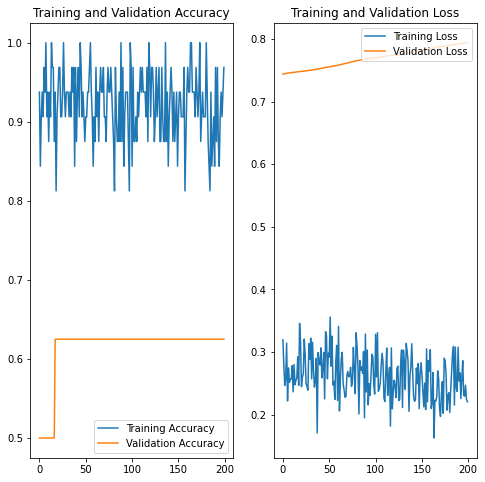

In [25]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
epochs=300
history2 = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.1640 - accuracy: 0.9688 - val_loss: 0.7942 - val_accuracy: 0.6250
Epoch 2/300
1/1 [==============================] - 1s 1s/step - loss: 0.2925 - accuracy: 0.8750 - val_loss: 0.7945 - val_accuracy: 0.6250
Epoch 3/300
1/1 [==============================] - 1s 1s/step - loss: 0.2305 - accuracy: 0.9688 - val_loss: 0.7948 - val_accuracy: 0.6250
Epoch 4/300
1/1 [==============================] - 1s 1s/step - loss: 0.2568 - accuracy: 0.9375 - val_loss: 0.7950 - val_accuracy: 0.6250
Epoch 5/300
1/1 [==============================] - 1s 1s/step - loss: 0.2256 - accuracy: 0.9062 - val_loss: 0.7953 - val_accuracy: 0.6250
Epoch 6/300
1/1 [==============================] - 1s 1s/step - loss: 0.2369 - accuracy: 0.9062 - val_loss: 0.7956 - val_accuracy: 0.6250
Epoch 7/300
1/1 [==============================] - 1s 1s/step - loss: 0.2463 - accuracy: 0.9375 - val_loss: 0.7959 - val_accuracy: 0.6250
Epoch 8/300
1/1 [=================

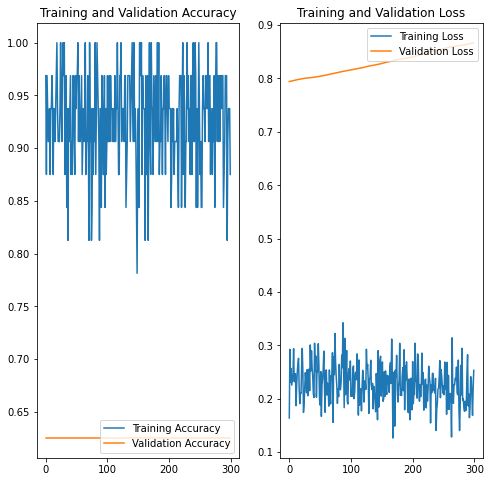

In [27]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()